# Assignment 5: Statistical Analysis (30 pt)

Use as many Python and markdown cells per question as you deem necessary. **DO NOT SUBMIT CODE THAT DOES NOT RUN.** You will lose points for code that throws errors. 

Questions 1 and 2 will use data describing various wetlands, intertidal zones, and ocean conditions in the United States from 1972-2015. This data has been adapted from [publicly available data from NASA](https://daac.ornl.gov/NACP/guides/Tidal_Wetland_Estuaries_Data.html). Note that this file uses the value `-9999` to denote missing data. This file's path is `data/tidal_wetland_estuaries.csv`.

Question 3 will be using time series data describing the proportion of electricity produced by coal in high income countries from [the World Bank](https://data.worldbank.org/indicator/EG.ELC.COAL.ZS). The path to the file is `data/coal-production.csv`.


## Question 1: t-tests (10 pt)

Using the data from `tidal_wetland_estuaries.csv`, test the hypothesis that soil organic carbon density (column name: `soc_density`) is **larger** in the East coast than the West coast with a t-test. Interpret the t-test. (5 pt)

Defend your choice of which type of t-test you used (3 pt).

Do the data meet the requirement for normal data? Why or why not? (2 pt) 

I used 2-sample t-test because it compares two sets of sample that isn't related. 

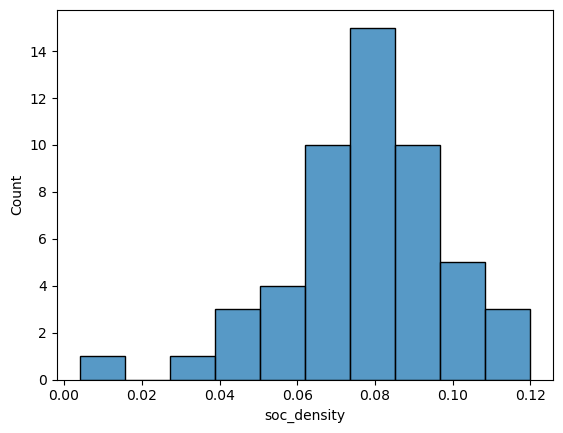

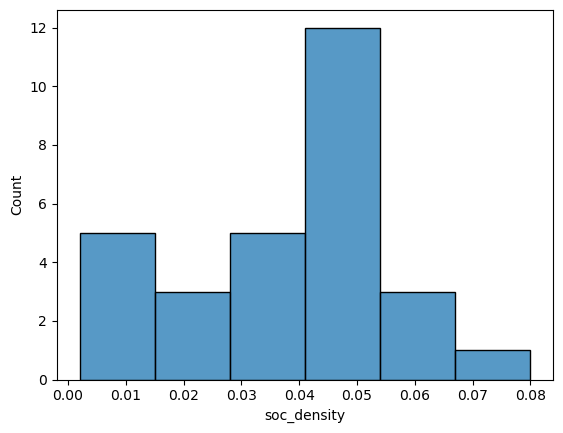

Ttest_indResult(statistic=8.45031778669312, pvalue=1.1530568956025485e-12)

In [6]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df=pd.read_csv('/Users/tao/assignment-5/data/tidal_wetland_estuaries.csv')
east_coast=df[df['coast']=='EAST']
west_coast=df[df['coast']=='WEST']

sns.histplot(east_coast['soc_density'])
plt.show()

sns.histplot(west_coast['soc_density'])
plt.show()

stats.ttest_ind(east_coast['soc_density'], west_coast['soc_density'])

The p value is so much smaller than 0.05, so there is definitely a great difference between the two areas. Based on the little test below, we can learn that East coast does have greater soil organic carbon density than West Coast.

In [18]:
east_coast_mean = east_coast['soc_density'].mean()
west_coast_mean = west_coast['soc_density'].mean()

print("East coast mean soc_density:", east_coast_mean)
print("West coast mean soc_density:", west_coast_mean)

East coast mean soc_density: 0.07757692307692311
West coast mean soc_density: 0.03779310344827588


Looking at the plots above, both looks relatively normal but skewed, there are about equal amount of data on both side from the mean, and it goes down when its further from the mean. 

## Question 2

Using the data from `tidal_wetland_estuaries.csv`, create a linear model to predict mean ocean salinity (column name: `ocean_salinity_mean`) from other environmental factors. (2 pt)

Create a model with a high R-squared value (> 0.80). All coefficients should be significant, and none should have VIF values above 5.0. (4 pt)

Interpret the summary of the model, focusing on the R-squared value and the regression coefficients. (3 pt)

Make diagnostic plots to ensure your data meets the assumptions of linear regression. The necessary functions have been imported for you. (1 pt).

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from utils import Linear_Reg_Diagnostic # do not change!

df = pd.read_csv('data/tidal_wetland_estuaries.csv')
df_sub = df.loc[(df['ocean_salinity_mean']>0) & (df['ocean_sst_mean']>0),:].reset_index(drop=True)


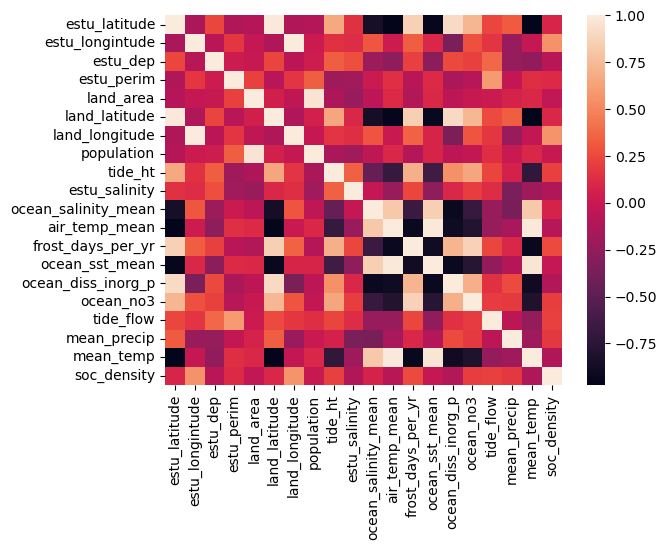

In [174]:
correlations = df_sub.corr()
sns.heatmap(correlations)
plt.show()

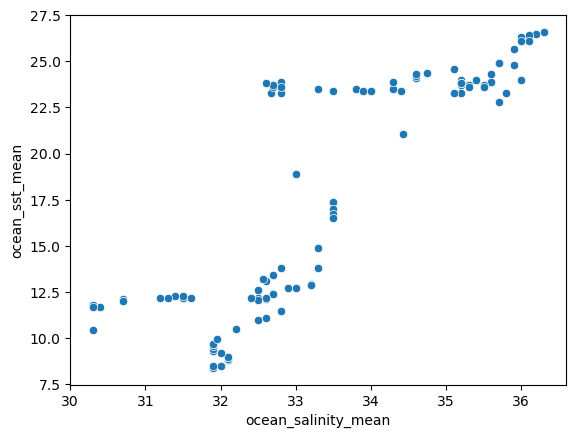

In [175]:
sns.scatterplot(data=df_sub, x='ocean_salinity_mean', y='ocean_sst_mean' )
plt.show()


In [176]:
model1 = smf.ols(formula='ocean_salinity_mean ~ ocean_sst_mean',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ocean_salinity_mean   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 3.923e+06
Date:                 Tue, 09 May 2023   Prob (F-statistic):          2.16e-258
Time:                         16:37:27   Log-Likelihood:                -348.24
No. Observations:                  115   AIC:                             700.5
Df Residuals:                      113   BIC:                             706.0
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         15.8632      0.472     33.638      0.000      14.929      16.797
ocean_sst_mean     1.0016      0.001   1980.620      0.000       1.001       1.003
==============================================================================
Omnibus:                     2323.532   Durbin-Watson:                   0.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.730
Skew:                           0.036   Prob(JB):                      0.00172
Kurtosis:                       1.372   Cond. No.                         935.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

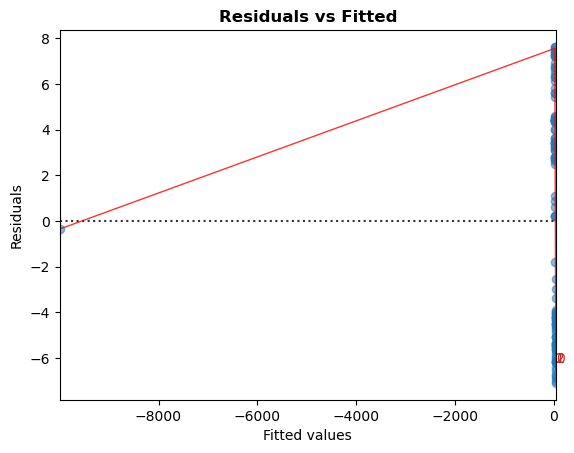

In [177]:
oceandiag = Linear_Reg_Diagnostic(model1)
oceandiag.residual_plot()

<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>

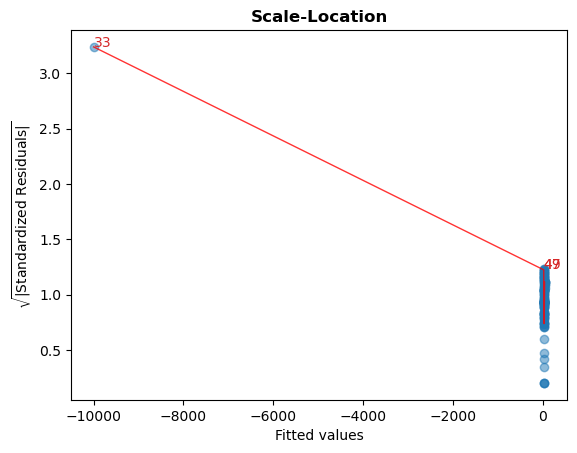

In [178]:
oceandiag.scale_location_plot()

<AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>

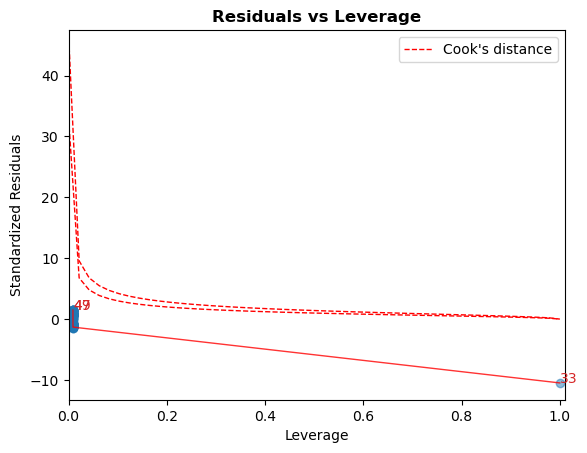

In [179]:
oceandiag.leverage_plot()

<AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>

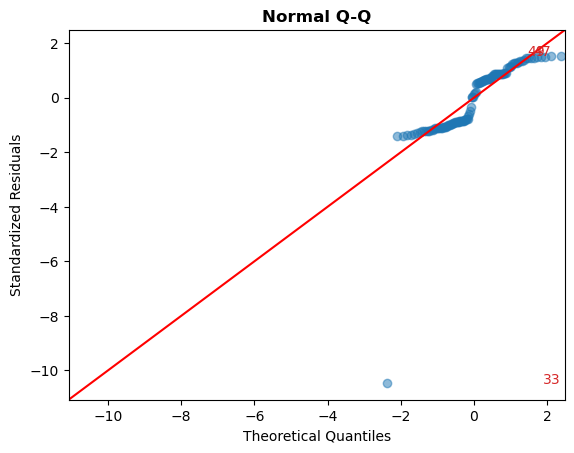

In [180]:
oceandiag.qq_plot()

In [181]:
diag1 = Linear_Reg_Diagnostic(model1)
diag1.vif_table()

         Features  VIF Factor
1  ocean_sst_mean        1.00
0       Intercept        1.01


I chose to use ocean_sst_mean as my other variable, because it has really high R-squared, significant P value and VIF under 5.0.
I feel like the linear regression models should fit, but for some reason, there could be an outlier in there some where that I don't know how to remove, which caused the plots to look not too great, but I think I tried to make the right plots. 

## Question 3 

Using the `coal-production.csv` data, model the proportion of electricity produced with coal in high income countries over time with an ARIMA model. 

Process the data to be useable for time series analysis. (2 pt)

Display your data. Does it appear to have a trend? If so, describe the trend. (1 pt)

Test for stationarity. (1 pt)

Make an ARIMA model of the time series, either by manually testing different types, or with an auto-ARIMA. What type of ARIMA model was found to be the best fit? (2 pt)

Visualize the fitted values of the ARIMA model, being sure to label each line. (2 pt)

Make a forecast for 25 years after the conclusion of the time series and visualize with observed and fitted values. (2 pt)

Text(0, 0.5, 'electricity_production')

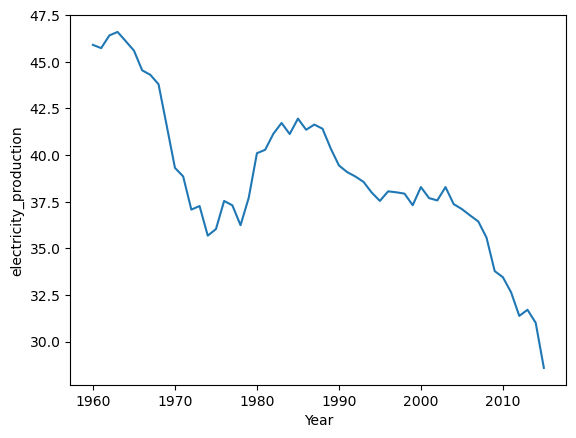

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/coal-production.csv')
df['year'] = pd.to_datetime(df['year'], format='%Y')
df = df.set_index('year').sort_index()
df.head()

fig, ax = plt.subplots()
ax.plot(df['electricity_prod'])
ax.set_xlabel('Year')
ax.set_ylabel('electricity_production')

According to the plot above, the electricity production has followed a decreasing trend over time.

In [29]:
from statsmodels.tsa.stattools import adfuller

def adf_print(time_series):
    adf_output = adfuller(time_series)
    stat = adf_output[0]
    pval = adf_output[1]
    print('ADF Statistic:', stat)
    print('p-value:', pval)
    return None

adf_print(df)

ADF Statistic: 1.872154432675823
p-value: 0.9984818799941668


The p-value is quite large, so time series is not stationary. 

In [30]:
from pmdarima import auto_arima

auto_arima_model = auto_arima(df['electricity_prod'])
auto_arima_model.summary()

/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/tao/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_r

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   56
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 -71.684
Date:                Tue, 09 May 2023   AIC                            149.368
Time:                        14:49:04   BIC                            155.390
Sample:                             0   HQIC                           151.697
                                 - 56                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8478      0.140      6.074      0.000       0.574       1.121
ma.L1         -0.6020      0.230     -2.622      0.009      -1.052      -0.152
sigma2         0.7894      0.171      4.604      0.000       0.453       1.125
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 1.33
Prob(Q):                              0.68   Prob(JB):                         0.51
Heteroskedasticity (H):               0.72   Skew:                             0.36
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Auto ARIMA found that the data fits ARIMA(1,1,1) the best. 

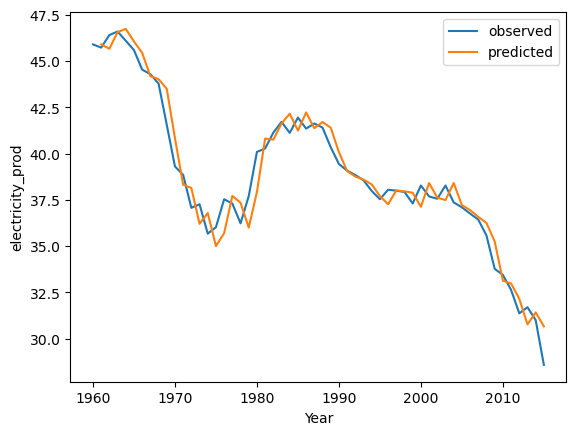

In [35]:
in_samp_pred = auto_arima_model.predict_in_sample()
in_samp_pred = pd.Series(in_samp_pred, index=df.index)

fig, ax = plt.subplots()
ax.plot(df, label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.set_xlabel('Year')
ax.set_ylabel('electricity_prod')
ax.legend()

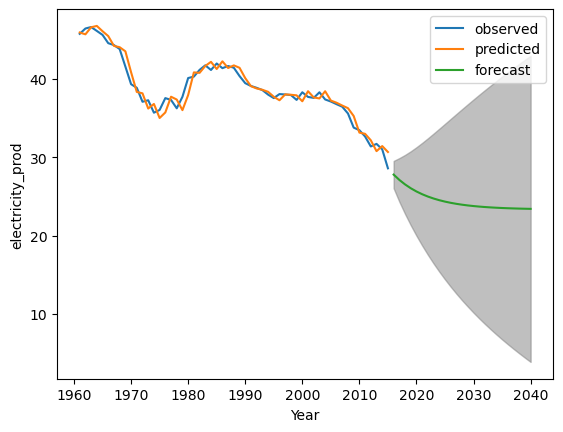

In [37]:
forecast, ci = auto_arima_model.predict(25, return_conf_int=True)
future_dates = pd.date_range(df.index[-1], periods=26, freq='AS-JAN',inclusive='neither')

fig, ax = plt.subplots()
ax.plot(df[1:], label='observed')
ax.plot(in_samp_pred[1:], label='predicted')
ax.plot(future_dates,forecast, label='forecast')
ax.fill_between(future_dates, ci[:,0], ci[:,1], color = 'gray', alpha=0.5)
ax.set_xlabel('Year')
ax.set_ylabel('electricity_prod')
ax.legend()